# Dev notebook - AS


## Load and process

In [1]:
%matplotlib widget
import time
import numpy as np
from aeromaps.core.process import create_process
from aeromaps.core.models import models_complex
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
process = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

## Set up variables

### Aviation scenario

In [3]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [4.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [4.0]

In [4]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=50.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=20.0,
    cruise_altitude=12000.0,
    ask_year=406000000,
    rc_cost=60000000,
    nrc_cost=10000000000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-5.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=80000000.0,
    nrc_cost=10000000000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2022,
    consumption_evolution=-10.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2024,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-30.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 2", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2029,
    consumption_evolution=-25.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=+10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 3", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Fleet renewal
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [7]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [10, 20, 20.0, 50.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 2.0, 5.0]

In [8]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [3, 10, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [5, 10, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [30, 20, 0, 0]

In [9]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    5,
    250,
    500,
    775,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

### Sustainability assessment

In [10]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 200.0

In [11]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

## Compute

In [12]:
process.compute()

In [13]:
process.vector_outputs_df["cumulative_co2_emissions"]

2000          NaN
2001          NaN
2002          NaN
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007          NaN
2008          NaN
2009          NaN
2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019     0.000000
2020     0.565481
2021     1.043921
2022     1.656139
2023     2.392711
2024     3.244859
2025     4.101820
2026     4.966773
2027     5.842149
2028     6.730432
2029     7.633663
2030     8.554223
2031     9.496677
2032    10.462969
2033    11.454834
2034    12.473917
2035    13.524449
2036    14.603041
2037    15.705720
2038    16.828144
2039    17.965363
2040    19.111356
2041    20.265622
2042    21.423015
2043    22.577511
2044    23.722110
2045    24.848902
2046    25.949303
2047    27.014415
2048    28.035421
2049    29.003856
2050    29.911674
Name: cumulative_co2_emissions, dtype: float64

## Results

In [14]:
# process.fleet_model.plot()

In [15]:
# process.fleet_model.df.loc[2019:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_ask',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_ask',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:old_reference:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:recent_reference:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_ask',
#                         ]].plot(stacked=True, kind='area')

In [16]:
# process.fleet_model.df.loc[2019:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_in_fleet',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_in_fleet',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:old_reference:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:recent_reference:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_in_fleet',]].plot(stacked=True, kind='area')

In [17]:
# process.fleet_model.df.loc[2000:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_non_recurring_costs',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_non_recurring_costs',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:old_reference:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:recent_reference:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_non_recurring_costs',]].plot(stacked=True, kind='area')

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


macc_dict = {}

for year in range(2020, 2050 + 1):
    name = []
    vol = []
    cost = []
    scost = []
    colors = []
    for category, sets in process.fleet_model.all_aircraft_elements.items():
        for aircraft_var in sets:
            if hasattr(aircraft_var, "parameters"):
                aircraft_var_name = aircraft_var.parameters.full_name
            else:
                aircraft_var_name = aircraft_var.full_name

            vol.append(
                process.fleet_model.df.loc[
                    year, aircraft_var_name + ":aircraft_carbon_abatement_volume"
                ]
                / 1000000
            )
            cost.append(
                process.fleet_model.df.loc[
                    year, aircraft_var_name + ":aircraft_carbon_abatement_cost"
                ]
            )
            scost.append(
                process.fleet_model.df.loc[
                    year, aircraft_var_name + ":aircraft_specific_carbon_abatement_cost"
                ]
            )
            if category == "Short Range":
                colors.append("gold")
            elif category == "Medium Range":
                colors.append("goldenrod")
            else:
                colors.append("darkgoldenrod")
            name.append(aircraft_var_name.split(":")[-1])

    name.extend(
        [
            el
            for el in [
                "Bio - HEFA FOG",
                "Bio - HEFA Others",
                "Bio - Alcohol to Jet",
                "Bio - FT MSW",
                "Bio - FT Others",
                "H2C",
                "H2CCCS",
                "H2G",
                "H2GCCS",
                "H2E",
                "Electrofuel",
                "OPS",
                "LF",
            ]
        ]
    )

    # Abatement effective in MtCO2e
    vol.extend(
        [
            elt / 1000000
            for elt in [
                process.vector_outputs_df.abatement_effective_hefa_fog[year],
                process.vector_outputs_df.abatement_effective_hefa_others[year],
                process.vector_outputs_df.abatement_effective_atj[year],
                process.vector_outputs_df.abatement_effective_ft_msw[year],
                process.vector_outputs_df.abatement_effective_ft_others[year],
                process.vector_outputs_df.abatement_effective_hydrogen_coal[year],
                process.vector_outputs_df.abatement_effective_hydrogen_coal_ccs[year],
                process.vector_outputs_df.abatement_effective_hydrogen_gas[year],
                process.vector_outputs_df.abatement_effective_hydrogen_gas_ccs[year],
                process.vector_outputs_df.abatement_effective_hydrogen_electrolysis[year],
                process.vector_outputs_df.abatement_effective_electrofuel[year],
                process.vector_outputs_df.operations_abatement_effective[year],
                process.vector_outputs_df.load_factor_abatement_effective[year],
            ]
        ]
    )

    # carbon abatement cost in (€/tCO2e)
    cost.extend(
        [
            el
            for el in [
                process.vector_outputs_df.carbon_abatement_cost_hefa_fog[year],
                process.vector_outputs_df.carbon_abatement_cost_hefa_others[year],
                process.vector_outputs_df.carbon_abatement_cost_atj[year],
                process.vector_outputs_df.carbon_abatement_cost_ft_msw[year],
                process.vector_outputs_df.carbon_abatement_cost_ft_others[year],
                process.vector_outputs_df.carbon_abatement_cost_h2_coal[year],
                process.vector_outputs_df.carbon_abatement_cost_h2_coal_ccs[year],
                process.vector_outputs_df.carbon_abatement_cost_h2_gas[year],
                process.vector_outputs_df.carbon_abatement_cost_h2_gas_ccs[year],
                process.vector_outputs_df.carbon_abatement_cost_h2_electrolysis[year],
                process.vector_outputs_df.carbon_abatement_cost_electrofuel[year],
                process.vector_outputs_df.operations_abatement_cost[year],
                process.vector_outputs_df.load_factor_abatement_cost[year],
            ]
        ]
    )

    scost.extend(
        [
            el
            for el in [
                process.vector_outputs_df.specific_carbon_abatement_cost_hefa_fog[year],
                process.vector_outputs_df.specific_carbon_abatement_cost_hefa_others[year],
                process.vector_outputs_df.specific_carbon_abatement_cost_atj[year],
                process.vector_outputs_df.specific_carbon_abatement_cost_ft_msw[year],
                process.vector_outputs_df.specific_carbon_abatement_cost_ft_others[year],
                process.vector_outputs_df.coal_h2_specific_abatement_cost[year],
                process.vector_outputs_df.coal_ccs_h2_specific_abatement_cost[year],
                process.vector_outputs_df.gas_h2_specific_abatement_cost[year],
                process.vector_outputs_df.gas_ccs_h2_specific_abatement_cost[year],
                process.vector_outputs_df.electrolysis_h2_specific_abatement_cost[year],
                process.vector_outputs_df.specific_carbon_abatement_cost_electrofuel[year],
                process.vector_outputs_df.operations_specific_abatement_cost[year],
                process.vector_outputs_df.load_factor_specific_abatement_cost[year],
            ]
        ]
    )

    colors.extend(
        [
            el
            for el in [
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "orange",
                "orange",
            ]
        ]
    )

    macc_df = pd.DataFrame(
        data=[vol, cost, scost, colors],
        columns=name,
        index=[
            "abatement_effective",
            "carbon_abatement_cost",
            "specific_carbon_abatement_cost",
            "colors",
        ],
    )
    macc_df = macc_df.transpose().sort_values(by="carbon_abatement_cost")

    macc_dict[year] = macc_df

In [19]:
macc_df

,abatement_effective,carbon_abatement_cost,specific_carbon_abatement_cost,colors
New Short-range Aircraft,-129.797383,-509.053388,-365.205939,gold
New Long-range Aircraft 2,19.521263,-331.797767,-238.038913,darkgoldenrod
New Long-range Aircraft,2.020761,-216.239319,-155.134777,darkgoldenrod
New Medium-range Aircraft,212.688785,-177.589769,-127.406752,goldenrod
recent_reference,1.697042,-131.315978,-94.20893,darkgoldenrod
old_reference,-0.005193,-131.315978,-94.20893,gold
old_reference,-0.003274,-131.315978,-94.20893,goldenrod
old_reference,-0.005895,-131.315978,-94.20893,darkgoldenrod
recent_reference,45.538154,-131.315978,-94.20893,gold
recent_reference,57.653907,-131.315978,-94.20893,goldenrod


3D steplot => mouais

In [20]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable, coolwarm


def f(x, y):
    return 500 / (1.035 ** (2050 - y))


def update_plot(years):
    plt.clf()
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Create a colormap for the legend
    cmap = LinearSegmentedColormap.from_list("custom_cmap", plt.cm.viridis(np.linspace(0, 1, 256)))

    for year in years:
        macc_df = macc_dict[year]

        maccneg_df = macc_df[macc_df["abatement_effective"] < 0]
        maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

        ##### POS ######

        heights_pos = maccpos_df["carbon_abatement_cost"].to_numpy()
        widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

        hatch_pos = maccpos_df["colors"].to_list()

        years_pos = [year] * len(heights_pos)

        ax.scatter(
            np.cumsum(widths_effective_pos),  # - widths_effective_pos, #incrorrect?
            years_pos,
            heights_pos,
            # c="#335C67",
            marker="o",
            label="Marginal abatement cost",
            c=maccpos_df["colors"].to_list(),
        )

        ax.step(
            np.cumsum(widths_effective_pos),  # - widths_effective_pos,
            years_pos,
            heights_pos,
            # c="#335C67",
            # marker='o',
            label="Marginal abatement cost",
            color="blue",
            alpha=0.3,
        )

        ##### NEG ######

    #         heights_neg = maccneg_df["carbon_abatement_cost"].to_list()
    #         heights_neg.append(0)
    #         heights_neg.insert(0, heights_neg[0])

    #         # # Max effective maccneg
    #         widths_effective_neg = maccneg_df["abatement_effective"].to_list()

    #         widths_effective_neg.insert(0, 0)
    #         widths_effective_neg.append(0)

    #         colors_neg = maccneg_df["colors"].to_list()

    #         years_neg = [year] * len(heights_neg)

    #         ax.step(
    #             np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg) + widths_effective_neg,
    #             years_neg,
    #             heights_neg,
    #             where="post",
    #             color="#335C67",
    #             label="Marginal emission cost",
    #             linewidth=1,
    #         )

    X = np.linspace(0, 2000, 10)
    Y = np.linspace(2020, 2050, 10)
    X, Y = np.meshgrid(X, Y)

    Z = f(X, Y)

    ax.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.4)

    ax.set_zlim(-1000, 2000)
    ax.set_ylim(2020, 2050)

    ax.set_xlabel("Abatement Effective")
    ax.set_ylabel("Year")
    ax.set_zlabel("MAC")
    ax.set_title("Carbon Abatement Cost for Positive Effective Abatement")

    plt.show()

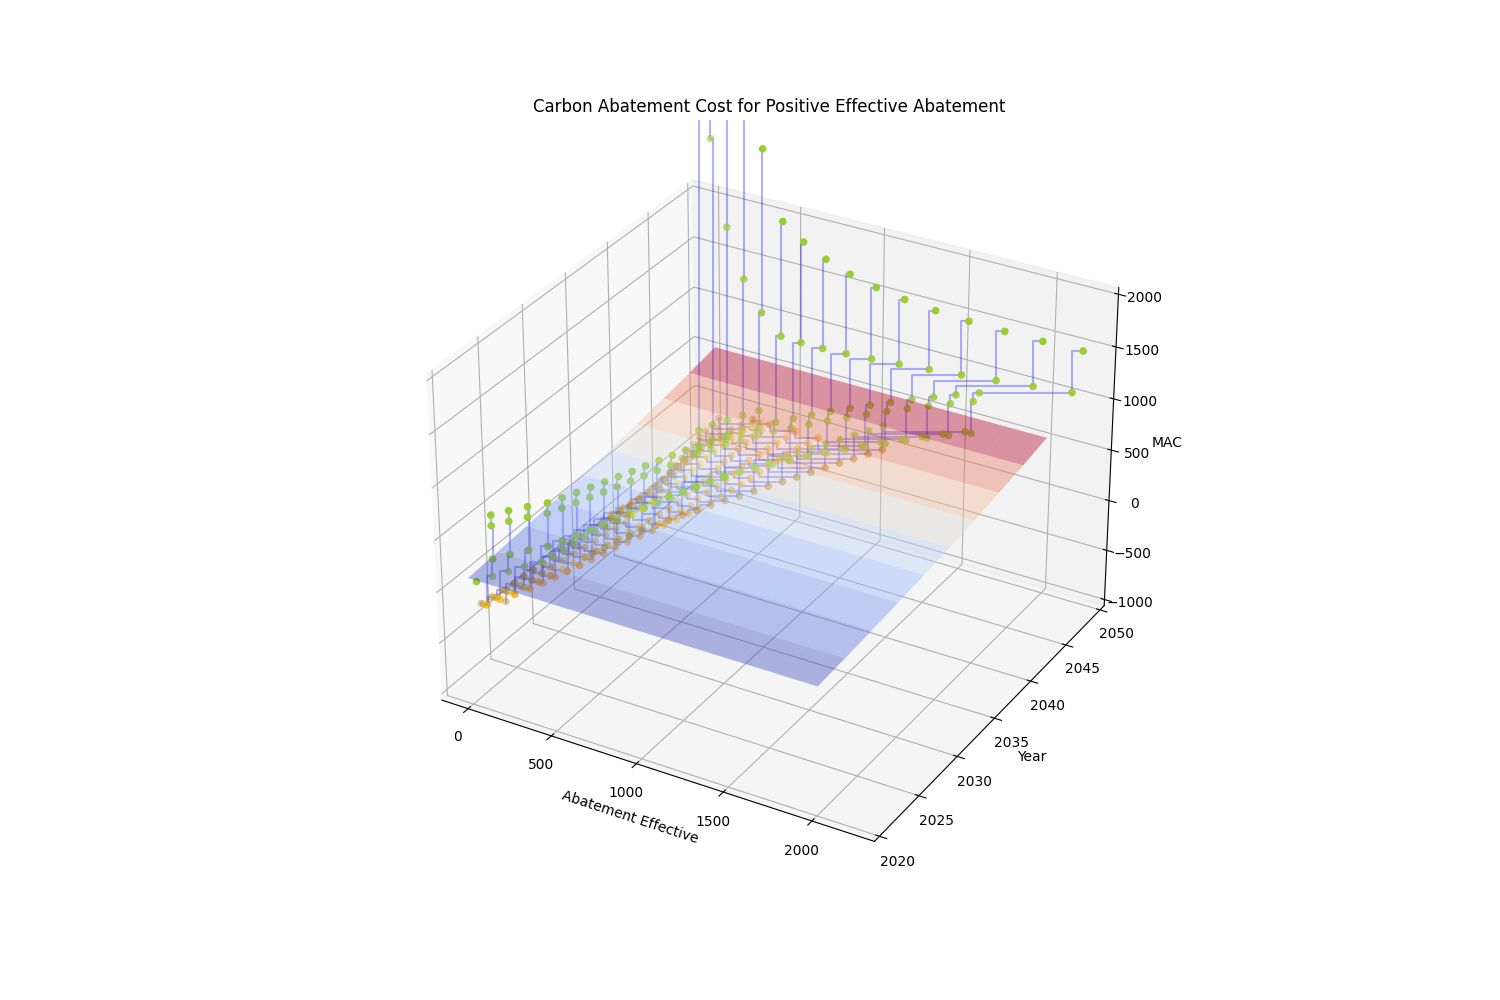

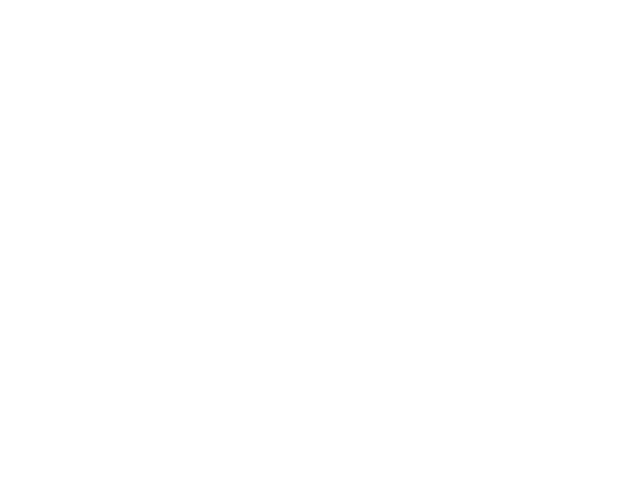

In [21]:
update_plot(range(2020, 2051))

#### Barplot == > Best 

In [22]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

offset = mcolors.TwoSlopeNorm(vmin=-4000.0, vcenter=0.0, vmax=10000)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable


def update_plot(years):
    plt.clf()
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)

    for year in years:

        scc_year = 500 / (1.035 ** (2050 - year))

        macc_df = macc_dict[year]

        maccneg_df = macc_df[macc_df["abatement_effective"] < 0]
        maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

        ##### POS ######

        heights_pos = maccpos_df["carbon_abatement_cost"].to_numpy()
        widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

        # List to store hatch codes
        hatch_list = []

        # Iterate over the initial list
        for value in heights_pos:
            # Check if the value is above the threshold
            if value > scc_year:
                hatch_list.append("oo")
            else:
                hatch_list.append("")

        years_pos = [year] * len(heights_pos)

        bottom = 0

        norm = Normalize(vmin=-500, vmax=2000)

        for i in range(len(heights_pos)):
            ax.bar(
                year,
                widths_effective_pos[i],
                color=plt.cm.RdBu_r(norm(heights_pos[i])),
                bottom=np.cumsum(widths_effective_pos)[i] - widths_effective_pos[i],
                edgecolor="black",
                hatch=hatch_list[i],
                width=1,
            )
    # Create a ScalarMappable to display the colormap as a legend

    sm = ScalarMappable(cmap=plt.cm.RdBu_r, norm=norm)
    sm.set_array([])  # Set an empty array since we don't have specific data values

    # Add colorbar legend
    cbar = plt.colorbar(sm, ax=ax, label="Carbon Abatement Cost", norm=norm)

    # Hatch legedn

    plt.legend(
        handles=[
            mpatches.Patch(facecolor="none", edgecolor="black", hatch="//"),
            mpatches.Patch(facecolor="none", edgecolor="black"),
        ],
        labels=["Above SCC", "Below or Equal to SCC"],
    )

    ##### NEG ######

    #         heights_neg = maccneg_df["carbon_abatement_cost"].to_list()
    #         heights_neg.append(0)
    #         heights_neg.insert(0, heights_neg[0])

    #         # # Max effective maccneg
    #         widths_effective_neg = maccneg_df["abatement_effective"].to_list()

    #         widths_effective_neg.insert(0, 0)
    #         widths_effective_neg.append(0)

    #         colors_neg = maccneg_df["colors"].to_list()

    #         years_neg = [year] * len(heights_neg)

    #         ax.step(
    #             np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg) + widths_effective_neg,
    #             years_neg,
    #             heights_neg,
    #             where="post",
    #             color="#335C67",
    #             label="Marginal emission cost",
    #             linewidth=1,
    #         )

    # ax.set_zlim(-1000,2000)
    # ax.set_ylim(2020,2050)

    ax.set_xlabel("Year")
    ax.set_ylabel("Abatement Effective")
    ax.set_title("Carbon Abatement Cost for Positive Effective Abatement")

    plt.show()

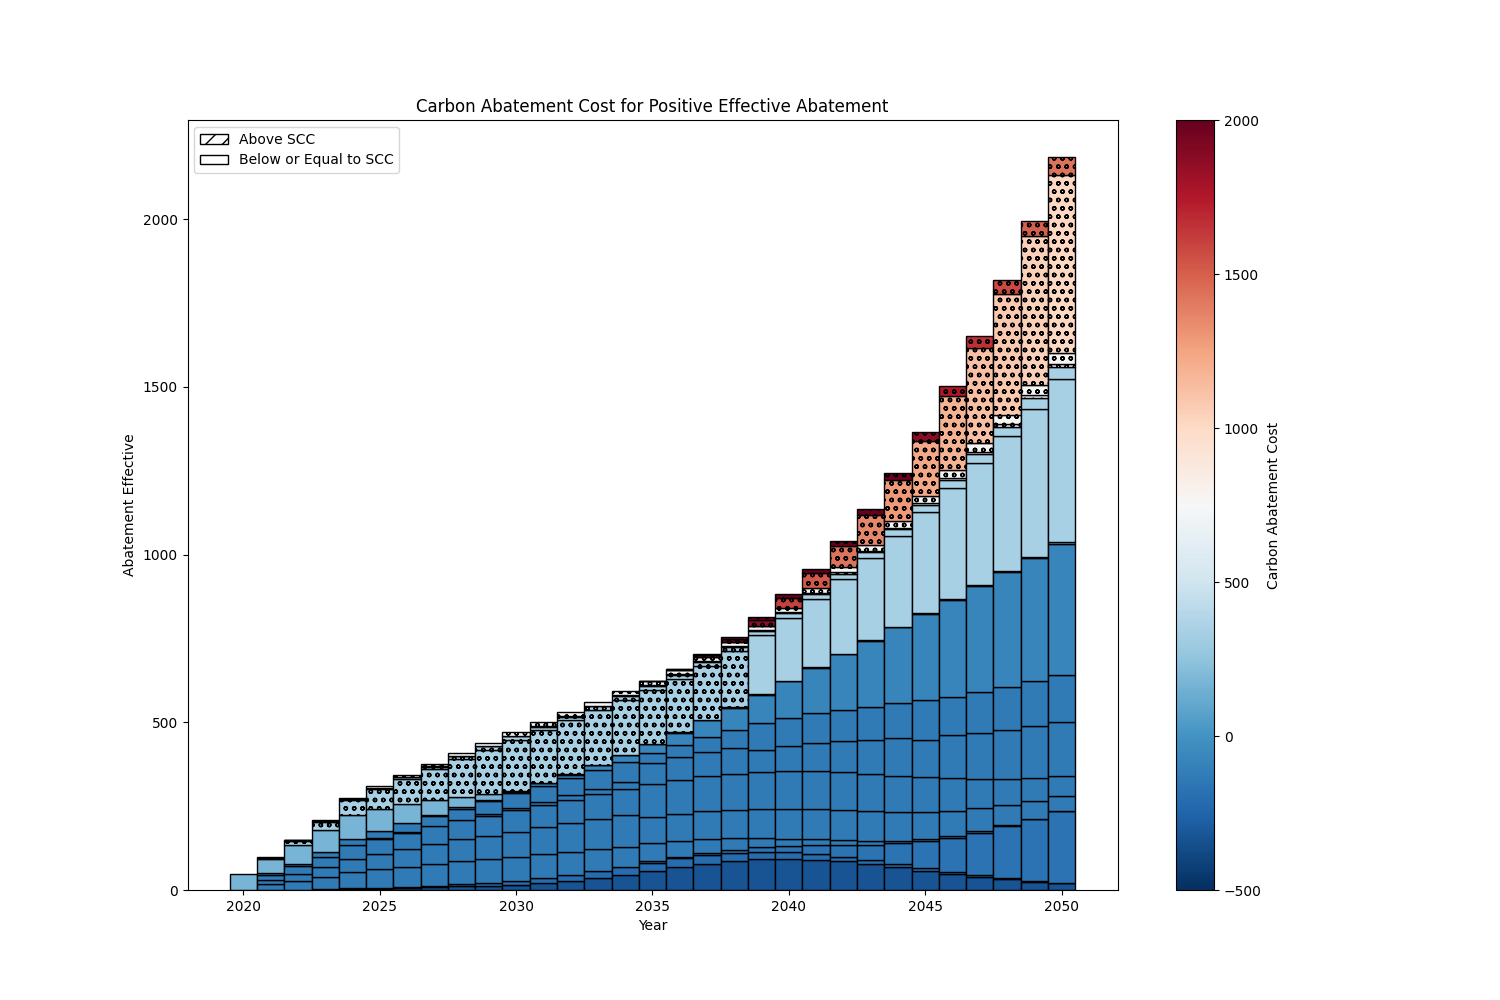

In [23]:
update_plot(range(2020, 2051))

# Shadow Carbon Pricing

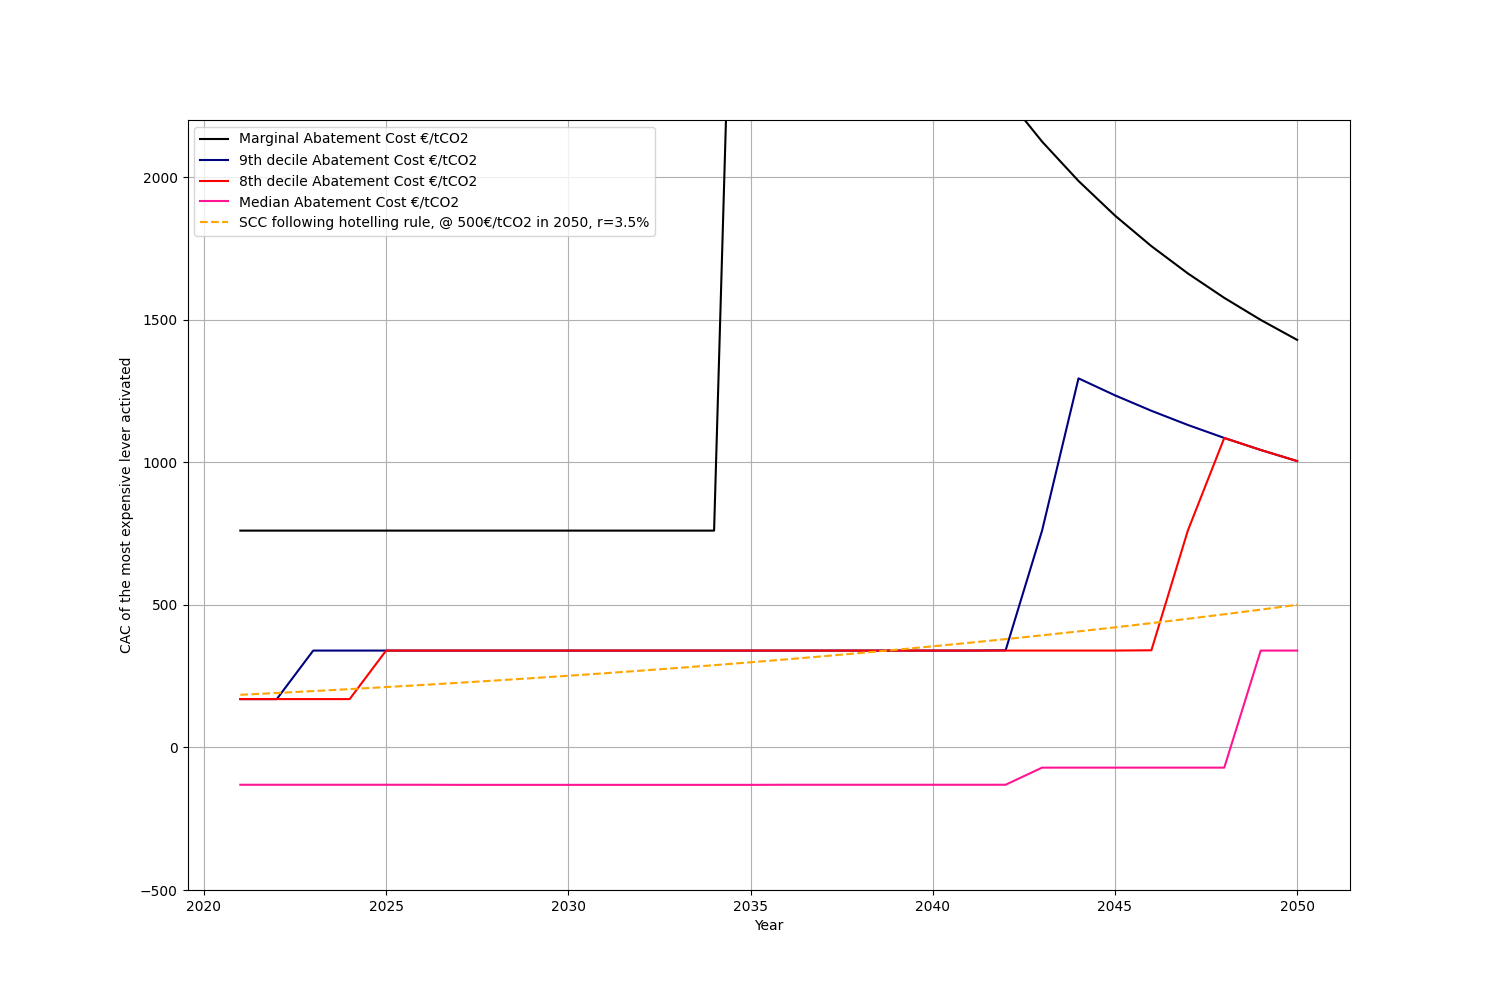

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

# Create a colormap for the legend
cmap = LinearSegmentedColormap.from_list("custom_cmap", plt.cm.viridis(np.linspace(0, 1, 256)))

marginal_cac = []
marginal_cac09 = []
marginal_cac08 = []
marginal_cac05 = []
scc = []


years = range(2021, 2051)
for year in years:
    macc_df = macc_dict[year]

    maccneg_df = macc_df[macc_df["abatement_effective"] < 0]
    maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

    ##### POS ######

    heights_pos = maccpos_df["carbon_abatement_cost"].to_numpy()
    widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

    cumwidths_pos = np.cumsum(widths_effective_pos)

    target_value = 0.9 * cumwidths_pos[-1]
    index_val = np.searchsorted(cumwidths_pos, target_value, side="right")

    marginal_cac09.append(heights_pos[min(index_val, len(heights_pos))])

    target_value = 0.8 * cumwidths_pos[-1]
    index_val = np.searchsorted(cumwidths_pos, target_value, side="right")
    marginal_cac08.append(heights_pos[min(index_val, len(heights_pos))])

    target_value = 0.5 * cumwidths_pos[-1]
    index_val = np.searchsorted(cumwidths_pos, target_value, side="right")
    marginal_cac05.append(heights_pos[min(index_val, len(heights_pos))])

    marginal_cac.append(max(heights_pos))

    scc.append(500 / (1.035 ** (2050 - year)))


ax.plot(years, marginal_cac, color="black", label="Marginal Abatement Cost €/tCO2")
ax.plot(years, marginal_cac09, color="navy", label="9th decile Abatement Cost €/tCO2")
ax.plot(years, marginal_cac08, color="red", label="8th decile Abatement Cost €/tCO2")
ax.plot(years, marginal_cac05, color="deeppink", label="Median Abatement Cost €/tCO2")
ax.plot(
    years,
    scc,
    color="orange",
    linestyle="--",
    label="SCC following hotelling rule, @ 500€/tCO2 in 2050, r=3.5%",
)

ax.set_ylim(-500, 2200)
ax.set_ylabel("CAC of the most expensive lever activated")
ax.set_xlabel("Year")

ax.grid()
ax.legend()

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


def update_plot(year):

    plt.clf()
    fig, ax = plt.subplots(figsize=(15, 10))

    macc_df = macc_dict[year]

    maccneg_df = macc_df[macc_df["abatement_effective"] < 0]
    maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

    ##### POS ######

    heights_pos = maccpos_df["carbon_abatement_cost"].to_list()
    names_pos = maccpos_df.index.to_list()
    heights_pos.insert(0, 0)
    heights_pos.append(heights_pos[-1])

    # # MAx effective maccpos
    widths_effective_pos = maccpos_df["abatement_effective"].to_list()
    widths_effective_pos.insert(0, 0)
    widths_effective_pos.append(widths_effective_pos[-1])

    colors_pos = maccpos_df["colors"].to_list()

    maccpos_curve = ax.step(
        np.cumsum(widths_effective_pos) - widths_effective_pos,
        heights_pos,
        where="post",
        color="#335C67",
        label="Marginal abatement cost",
        linewidth=1,
    )

    for i in range(len(widths_effective_pos) - 2):
        x_position = (
            np.cumsum(widths_effective_pos)[i] + np.cumsum(widths_effective_pos)[i + 1]
        ) / 2
        y_position = min(2000 - 10, heights_pos[i + 1] + 5)
        ax.text(
            x_position,
            y_position,
            f"{names_pos[i]}\n {int(heights_pos[i + 1])}",
            rotation=0,
            size=8,
            ha="center",
            va="center",
        )

    # Fill under the step plot with different colors for each step
    for i in range(0, (len(widths_effective_pos) - 2)):
        # Create a polygon for each step
        polygon = plt.Polygon(
            [
                (np.cumsum(widths_effective_pos)[i], 0),
                (np.cumsum(widths_effective_pos)[i], heights_pos[i + 1]),
                (np.cumsum(widths_effective_pos)[i + 1], heights_pos[i + 1]),
                (np.cumsum(widths_effective_pos)[i + 1], 0),
            ],
            closed=True,
            alpha=1,
            facecolor=colors_pos[i],
            edgecolor="#335C67",
            linewidth=1,
            linestyle="--",
        )
        ax.add_patch(polygon)

    ##### NEG #####

    heights_neg = maccneg_df["carbon_abatement_cost"].to_list()
    names_neg = maccneg_df.index.to_list()

    heights_neg.append(0)
    heights_neg.insert(0, heights_neg[0])

    # # MAx effective maccneg
    widths_effective_neg = maccneg_df["abatement_effective"].to_list()

    widths_effective_neg.insert(0, 0)
    widths_effective_neg.append(0)

    colors_neg = maccneg_df["colors"].to_list()

    maccneg_curve = ax.step(
        np.cumsum(widths_effective_neg)[-1]
        - np.cumsum(widths_effective_neg)
        + widths_effective_neg,
        heights_neg,
        where="post",
        color="#335C67",
        label="Marginal emission cost",
        linewidth=1,
    )

    for i in range(len(widths_effective_neg) - 2):
        x_position = (
            np.cumsum(widths_effective_neg)[-1]
            - (np.cumsum(widths_effective_neg)[i] + np.cumsum(widths_effective_neg)[i + 1]) / 2
        )
        y_position = max(-2000 + 10, heights_neg[i + 1] + 5)
        ax.text(
            x_position,
            y_position,
            f"{names_neg[i]}\n {int(heights_neg[i + 1])}",
            rotation=0,
            size=8,
            ha="center",
            va="center",
        )

    # Fill under the step plot with different colors for each step
    for i in range(0, (len(widths_effective_neg) - 2)):
        # Create a polygon for each step
        polygon = plt.Polygon(
            [
                (np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i], 0),
                (
                    np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i],
                    heights_neg[i + 1],
                ),
                (
                    np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i + 1],
                    heights_neg[i + 1],
                ),
                (np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i + 1], 0),
            ],
            closed=True,
            alpha=1,
            facecolor=colors_neg[i],
            edgecolor="#335C67",
            linewidth=1,
            linestyle="--",
        )
        ax.add_patch(polygon)

    ax.set_ylabel("Carbon Abatement Cost (€/t$\mathregular{CO_2}$)")
    ax.set_xlabel("$\mathregular{CO_2}$ abatted (Mt)")

    ax.axhline(0, color="black", linestyle="--", linewidth=2)

    ax.axvline(0, color="black", linestyle="--", linewidth=2)

    legend_patches_1 = [
        mpatches.Patch(color="gold", alpha=1, label="Short-Range Efficiency"),
        mpatches.Patch(color="goldenrod", alpha=1, label="Medium-Range Efficiency"),
        mpatches.Patch(color="darkgoldenrod", alpha=1, label="Long-Range Efficiecny"),
        mpatches.Patch(color="yellowgreen", alpha=1, label="Energy"),
        mpatches.Patch(color="orange", alpha=1, label="Operations"),
    ]

    ax.add_artist(ax.legend(handles=legend_patches_1, title="Type of lever", loc="upper right"))

    ax.set_xlim(
        np.cumsum(widths_effective_neg)[-1] - 50,
        np.cumsum(widths_effective_pos)[len(widths_effective_pos) - 2] + 50,
    )

    ax.axvspan(xmin=ax.get_xlim()[0], xmax=0, facecolor="red", alpha=0.1, clip_on=True)
    ax.axvspan(xmin=0, xmax=ax.get_xlim()[1], facecolor="blue", alpha=0.1, clip_on=True)

    legend_patches = [
        mpatches.Patch(
            color="red",
            alpha=0.1,
            label="Extra emissions zone\nnegative abatement costs are\nassociated with extra costs",
        ),
        mpatches.Patch(color="blue", alpha=0.1, label="Carbon abatement zone"),
    ]
    ax.set_ylim(
        max(-2000, min(min(heights_pos), min(heights_neg)) - 50),
        min(2000, max(max(heights_neg), max(heights_pos)) + 50),
    )

    ax.legend(handles=legend_patches, loc="upper left")

    ax.grid()
    plt.show()
    return macc_df

In [26]:
from ipywidgets import interact

# Use interactive to create the slider widget
a = interact(update_plot, year=(2020, 2050, 1))

interactive(children=(IntSlider(value=2035, description='year', max=2050, min=2020), Output()), _dom_classes=(…

In [27]:
vol = pd.DataFrame()
vol2 = pd.DataFrame()
vol1 = pd.DataFrame()
for category, sets in process.fleet_model.all_aircraft_elements.items():

    category_recent_reference = process.fleet_model.all_aircraft_elements[category][1]
    category_old_reference = process.fleet_model.all_aircraft_elements[category][0]

    for aircraft_var in sets:
        if hasattr(aircraft_var, "parameters"):
            aircraft_var_name = aircraft_var.parameters.full_name
            aircraft_ask = (
                process.fleet_model.df.loc[:, aircraft_var_name + ":aircraft_rpk"]
                / process.vector_outputs_df.load_factor[2019]
                * 100
            )
            aircraft_energy = (
                1 + float(aircraft_var.parameters.consumption_evolution) / 100
            ) * category_recent_reference.energy_per_ask
            aircraft_abate = process.fleet_model.df.loc[
                :, aircraft_var_name + ":aircraft_carbon_abatement_volume"
            ]
            aircraft_share = process.fleet_model.df.loc[:, aircraft_var_name + ":aircraft_share"]

        else:
            aircraft_var_name = aircraft_var.full_name
            aircraft_energy = aircraft_var.energy_per_ask
            aircraft_ask = (
                process.fleet_model.df.loc[:, aircraft_var_name + ":aircraft_rpk"]
                / process.vector_outputs_df.load_factor[2019]
                * 100
            )
            aircraft_abate = process.fleet_model.df.loc[
                :, aircraft_var_name + ":aircraft_carbon_abatement_volume"
            ]
            aircraft_share = process.fleet_model.df.loc[:, aircraft_var_name + ":aircraft_share"]

        vol = pd.concat([vol, aircraft_energy * aircraft_ask], axis=1)
        vol1 = pd.concat([vol1, aircraft_abate], axis=1)
        vol2 = pd.concat([vol2, aircraft_share * aircraft_energy], axis=1)

In [43]:
vol1.sum(axis=1)

2000    0.000000e+00
2001    0.000000e+00
2002    0.000000e+00
2003    0.000000e+00
2004    0.000000e+00
2005    0.000000e+00
2006    0.000000e+00
2007    0.000000e+00
2008    0.000000e+00
2009    0.000000e+00
2010    0.000000e+00
2011    0.000000e+00
2012    0.000000e+00
2013    0.000000e+00
2014    0.000000e+00
2015    0.000000e+00
2016    0.000000e+00
2017    0.000000e+00
2018    0.000000e+00
2019    0.000000e+00
2020   -9.938144e+07
2021    3.470171e+07
2022    5.842473e+07
2023    8.760859e+07
2024    1.222045e+08
2025    1.430767e+08
2026    1.635111e+08
2027    1.833046e+08
2028    2.024537e+08
2029    2.214737e+08
2030    2.400714e+08
2031    2.588361e+08
2032    2.781051e+08
2033    2.981650e+08
2034    3.192112e+08
2035    3.390257e+08
2036    3.612376e+08
2037    3.839996e+08
2038    4.070140e+08
2039    4.299378e+08
2040    4.524064e+08
2041    4.740442e+08
2042    4.944750e+08
2043    5.133445e+08
2044    5.303678e+08
2045    5.453984e+08
2046    5.584993e+08
2047    5.699

In [29]:
process.vector_outputs_df.energy_per_ask_without_operations_short_range_dropin_fuel[2019]

1.1531235517191722

In [30]:
vol1.sum(axis=1) / 1e6

2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005      0.000000
2006      0.000000
2007      0.000000
2008      0.000000
2009      0.000000
2010      0.000000
2011      0.000000
2012      0.000000
2013      0.000000
2014      0.000000
2015      0.000000
2016      0.000000
2017      0.000000
2018      0.000000
2019      0.000000
2020    -99.381440
2021     34.701711
2022     58.424728
2023     87.608595
2024    122.204498
2025    143.076740
2026    163.511147
2027    183.304612
2028    202.453707
2029    221.473655
2030    240.071392
2031    258.836073
2032    278.105146
2033    298.165038
2034    319.211245
2035    339.025653
2036    361.237565
2037    383.999599
2038    407.013972
2039    429.937806
2040    452.406360
2041    474.044246
2042    494.475022
2043    513.344465
2044    530.367816
2045    545.398368
2046    558.499283
2047    569.988779
2048    580.429275
2049    590.549832
2050    601.122379
1966      0.000000
1967      0.

In [31]:
(
    (
        process.vector_outputs_df["co2_emissions_2019technology"]
        - process.vector_outputs_df[
            "co2_emissions_including_aircraft_efficiency"
            # "co2_emissions_including_operations"
            # "co2_emissions_including_load_factor"
            # "co2_emissions_including_energy"
        ]
    )
)

2000           NaN
2001           NaN
2002           NaN
2003           NaN
2004           NaN
2005           NaN
2006           NaN
2007           NaN
2008           NaN
2009           NaN
2010           NaN
2011           NaN
2012           NaN
2013           NaN
2014           NaN
2015           NaN
2016           NaN
2017           NaN
2018           NaN
2019      0.000000
2020   -116.919341
2021     40.803620
2022     68.701093
2023    103.035952
2024    143.752671
2025    168.341384
2026    192.421343
2027    215.749122
2028    238.316928
2029    260.726710
2030    282.634268
2031    304.730681
2032    327.412531
2033    351.016838
2034    375.774061
2035    399.305385
2036    425.534415
2037    452.459239
2038    479.753494
2039    507.045982
2040    533.950228
2041    560.079952
2042    585.061908
2043    608.562793
2044    630.340382
2045    650.313754
2046    668.630209
2047    685.695884
2048    702.142297
2049    718.726606
2050    736.197532
dtype: float64

In [32]:
# emissions référence ==> OK!!!
(
    process.vector_outputs_df["co2_emissions_2019technology"] * 1e12
    - (
        process.vector_outputs_df.kerosene_emission_factor
        * process.vector_outputs_df.energy_per_ask_without_operations_short_range_dropin_fuel[2019]
        * process.vector_outputs_df.rpk_short_range
        / process.vector_outputs_df.load_factor[2019]
        * 100
    )
    - (
        process.vector_outputs_df.kerosene_emission_factor
        * process.vector_outputs_df.energy_per_ask_without_operations_medium_range_dropin_fuel[2019]
        * process.vector_outputs_df.rpk_medium_range
        / process.vector_outputs_df.load_factor[2019]
        * 100
    )
    - (
        process.vector_outputs_df.kerosene_emission_factor
        * process.vector_outputs_df.energy_per_ask_without_operations_long_range_dropin_fuel[2019]
        * process.vector_outputs_df.rpk_long_range
        / process.vector_outputs_df.load_factor[2019]
        * 100
    )
)

2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
2016             NaN
2017             NaN
2018             NaN
2019    1.691215e+14
2020    5.750132e+13
2021    8.540637e+13
2022    1.133114e+14
2023    1.412165e+14
2024    1.691215e+14
2025    1.758864e+14
2026    1.829218e+14
2027    1.902387e+14
2028    1.978483e+14
2029    2.057622e+14
2030    2.139927e+14
2031    2.225524e+14
2032    2.314545e+14
2033    2.407127e+14
2034    2.503412e+14
2035    2.603548e+14
2036    2.707690e+14
2037    2.815998e+14
2038    2.928637e+14
2039    3.045783e+14
2040    3.167614e+14
2041    3.294319e+14
2042    3.426092e+14
2043    3.563135e+14
2044    3.705661e+14
2045    3.853887e+14
2046    4.008043e+14
2047    4.168

In [33]:
## MARCHE PAR CALCUL DETOURNé!


(
    (
        process.vector_outputs_df["co2_emissions_2019technology"]
        - process.vector_outputs_df[
            "co2_emissions_including_aircraft_efficiency"
            # "co2_emissions_including_operations"
            # "co2_emissions_including_load_factor"
            # "co2_emissions_including_energy"
        ]
    )
) * 1e12 - (
    (
        process.vector_outputs_df.kerosene_emission_factor
        * process.vector_outputs_df.energy_per_ask_without_operations_short_range_dropin_fuel[2019]
        * process.vector_outputs_df.rpk_short_range
        / process.vector_outputs_df.load_factor[2019]
        * 100
    )
    + (
        process.vector_outputs_df.kerosene_emission_factor
        * process.vector_outputs_df.energy_per_ask_without_operations_medium_range_dropin_fuel[2019]
        * process.vector_outputs_df.rpk_medium_range
        / process.vector_outputs_df.load_factor[2019]
        * 100
    )
    + (
        process.vector_outputs_df.kerosene_emission_factor
        * process.vector_outputs_df.energy_per_ask_without_operations_long_range_dropin_fuel[2019]
        * process.vector_outputs_df.rpk_long_range
        / process.vector_outputs_df.load_factor[2019]
        * 100
    )
    - (vol.sum(axis=1) * process.vector_outputs_df.kerosene_emission_factor)
)

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
2016             NaN
2017             NaN
2018             NaN
2019   -3.469820e+13
2020   -1.343201e+14
2021    6.101909e+12
2022    1.027636e+13
2023    1.542736e+13
2024    2.154817e+13
2025    2.526464e+13
2026    2.891020e+13
2027    3.244451e+13
2028    3.586322e+13
2029    3.925306e+13
2030    4.256288e+13
2031    4.589461e+13
2032    4.930738e+13
2033    5.285180e+13
2034    5.656282e+13
2035    6.027973e+13
2036    6.429685e+13
2037    6.845964e+13
2038    7.273952e+13
2039    7.710818e+13
2040    8.154387e+13
2041    8.603571e+13
2042    9.058

In [34]:
# emissions totales => OK!!!
process.vector_outputs_df["co2_emissions_including_aircraft_efficiency"] * 1e12 - (
    vol.sum(axis=1) * process.vector_outputs_df.kerosene_emission_factor
)

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
2016             NaN
2017             NaN
2018             NaN
2019    2.038197e+14
2020    1.918214e+14
2021    7.930446e+13
2022    1.030351e+14
2023    1.257891e+14
2024    1.475733e+14
2025    1.506217e+14
2026    1.540116e+14
2027    1.577942e+14
2028    1.619850e+14
2029    1.665091e+14
2030    1.714298e+14
2031    1.766578e+14
2032    1.821471e+14
2033    1.878609e+14
2034    1.937783e+14
2035    2.000751e+14
2036    2.064721e+14
2037    2.131401e+14
2038    2.201242e+14
2039    2.274701e+14
2040    2.352176e+14
2041    2.433962e+14
2042    2.520

In [35]:
diff = (
    vol.sum(axis=1)
    / (process.vector_outputs_df.rpk / (process.vector_outputs_df.load_factor[2019] / 100))
) - process.vector_outputs_df.energy_per_ask_mean_without_operations

In [36]:
diff

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000   -1.651277e+00
2001   -1.620164e+00
2002   -1.644588e+00
2003   -1.580529e+00
2004   -1.503100e+00
2005   -1.469270e+00
2006   -1.413829e+00
2007   -1.359056e+00
2008   -1.301729e+00
2009   -1.253006e+00
2010   -1.246321e+00
2011   -1.199496e+00
2012   -1.164463e+00
2013   -1.142345e+00
2014   -1.113397e+00
2015   -1.099149e+00
2016   -1.076889e+00
2017   -1.077995e+00
2018   -1.054791e+00
2019   -3.711109e-02
2020   -3.673621e-01
2021    0.000000e+00
2022    2.220446e-16
2023    0.000000e+00
2024   -1.110223e-16
2025   -4.440892e-16
2026    0.000000e+00
2027   -4.440892e-16
2028   -1.110223e-16
2029    0.000000e+00
2030    2.220446e-16
2031    0.000000e+00
2032    0.000000e+00
2033    0.000000e+00
2034    0.000000e+00
2035   -1.110223e-16
2036    0.000000e+00
2037    1.110223e-16
2038   -1.110223e-16
2039   -1.110223e-16
2040    0.000000e+00
2041    1.110223e-16
2042    0.000

In [37]:
diff * process.vector_outputs_df.rpk / (
    process.vector_outputs_df.load_factor[2019] / 100
) * process.vector_outputs_df.kerosene_emission_factor

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000   -5.399337e+14
2001   -5.144165e+14
2002   -5.356278e+14
2003   -5.326140e+14
2004   -5.839015e+14
2005   -6.189842e+14
2006   -6.338566e+14
2007   -6.602555e+14
2008   -6.457688e+14
2009   -6.152513e+14
2010   -6.614526e+14
2011   -6.784767e+14
2012   -6.938946e+14
2013   -7.181045e+14
2014   -7.417407e+14
2015   -7.871553e+14
2016   -8.282139e+14
2017   -8.954460e+14
2018   -9.400111e+14
2019   -3.469820e+13
2020   -1.167822e+14
2021    0.000000e+00
2022    1.390972e-01
2023    0.000000e+00
2024   -1.038038e-01
2025   -4.318240e-01
2026    0.000000e+00
2027   -4.670608e-01
2028   -1.214358e-01
2029    0.000000e+00
2030    2.626900e-01
2031    0.000000e+00
2032    0.000000e+00
2033    0.000000e+00
2034    0.000000e+00
2035   -1.598012e-01
2036    0.000000e+00
2037    1.728410e-01
2038   -1.797547e-01
2039   -1.869449e-01
2040    0.000000e+00
2041    2.021996e-01
2042    0.000

In [38]:
process.fleet_model.df

,Short Range:SR conventional narrow-body:recent_reference:single_aircraft_share,Short Range:SR conventional narrow-body:old_reference:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Aircraft:single_aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:old_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range Aircraft:single_aircraft_share,Long Range:LR conventional wide-body:recent_reference:single_aircraft_share,Long Range:LR conventional wide-body:old_reference:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 2:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 3:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_share,Short Range:SR conventional narrow-body:recent_reference:aircraft_share,Short Range:SR conventional narrow-body:old_reference:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:aircraft_share,Medium Range:MR conventional narrow-body:old_reference:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 3:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 2:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_share,Long Range:LR conventional wide-body:recent_reference:aircraft_share,Long Range:LR conventional wide-body:old_reference:aircraft_share,Short Range:SR conventional narrow-body:energy_consumption,Short Range:SR conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR conventional narrow-body:energy_consumption:hydrogen,Short Range:SR conventional narrow-body:energy_consumption:electric,Short Range:SR conventional narrow-body:energy_consumption:hybrid_electric,Short Range:SR conventional narrow-body:share:total,Short Range:SR conventional narrow-body:share:dropin_fuel,Short Range:SR conventional narrow-body:share:hydrogen,Short Range:SR conventional narrow-body:share:electric,Short Range:SR conventional narrow-body:share:hybrid_electric,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Short Range:share:electric,Short Range:share:hybrid_electric,Medium Range:MR conventional narrow-body:energy_consumption,Medium Range:MR conventional narrow-body:energy_consumption:dropin_fuel,Medium Range:MR conventional narrow-body:energy_consumption:hydrogen,Medium Range:MR conventional narrow-body:energy_consumption:electric,Medium Range:MR conventional narrow-body:energy_consumption:hybrid_electric,Medium Range:MR conventional narrow-body:share:total,Medium Range:MR conventional narrow-body:share:dropin_fuel,Medium Range:MR conventional narrow-body:share:hydrogen,Medium Range:MR conventional narrow-body:share:electric,Medium Range:MR conventional narrow-body:share:hybrid_electric,Medium Range:share:dropin_fuel,Medium Range:share:hydrogen,Medium Range:share:electric,Medium Range:share:hybrid_electric,Long Range:LR conventional wide-body:energy_consumption,Long Range:LR conventional wide-body:energy_consumption:dropin_fuel,Long Range:LR conventional wide-body:energy_consumption:hydrogen,Long Range:LR conventional wide-body:energy_consumption:electric,Long Range:LR conventional wide-body:energy_consumption:hybrid_electric,Long Range:LR conventional wide-body:share:total,Long Range:LR conventional wide-body:share:dropin_fuel,Long Range:LR conventional wide-body:share:hydrogen,Long Range:LR conventional wide-body:share:electric,Long Range:LR conventional wide-body:share:hybrid_electric,Long Range:share:dropin_fuel,Long Range:share:hydrogen,Long Range:share:electric,Long Range:share:hybrid_electric,Short Range:SR conventional narrow-body:doc_non_energy,Short Range:SR conventional narrow-bod

In [39]:
process.vector_outputs_df.energy_per_ask_mean.loc[
    2020 - 1
] / process.vector_outputs_df.energy_per_ask_mean_without_operations.loc[2020 - 1]

1.0

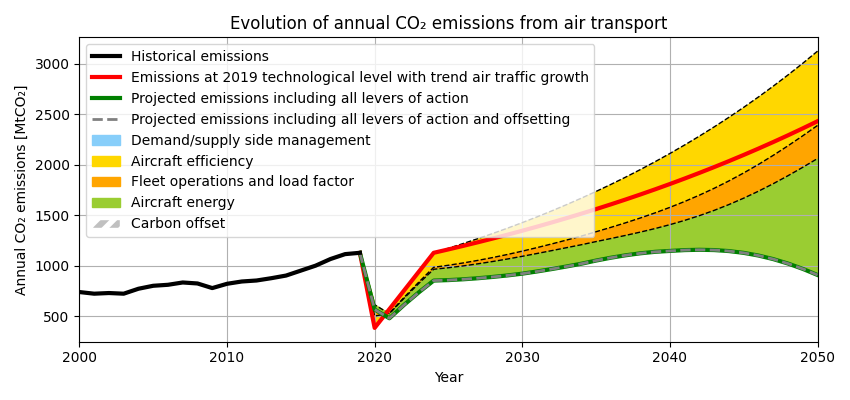

In [40]:
process.plot("air_transport_co2_emissions", save=False)